# Лекция 4: Работа с таблицами

__Автор: Сергей Вячеславович Макрушин__ e-mail: SVMakrushin@fa.ru 

Финансовый универсиет, 2020 г. 

__Автор: Сергей Вячеславович Макрушин, 2022 г.__

e-mail: s-makrushin@yandex.ru 

V 0.4 02.10.2022

## Разделы: <a class="anchor" id="разделы"></a>

* [Хранение табличных данных](#хранение)
* [CSV](#_csv)
* [Excel, инструменты для работы с Excel в Python](#excel)
* [Хlwings](#xlwings)
    * [Установка и настройка xlwings](#xlwings_установка) 
    * [Работа с Excel с помощью xlwings](#xlwings2) 
    * [Работа с протяженными диапазонами в xlwings](#диапазоны)     
    * [Работа с  листами](#листы)         
    * [Работа с  Pandas и NumPy в xlwings](#Pandas)         
    * [Продвинутые опции работы с Range](#Range)         
        * [Работа с размером и форматированием](#форматирование)         
        * [Работа с форматом ячейки](#формат)             
        * [Работа с формулами](#формула)             
        * [Добавление и удаление диапазонов](#Добавление)             
    * [Интеграция графиков в Excel](#график)             
* [Создание макросов на xlwings в Excel](#макрос)             
    * [Создание пользовательских функций Excel на xlwings](#пользовательских)             
    * [Формулы массива в Excel и создание UDF функций массива](#UDF_массива)             
* [Организация данных в виде многомерных кубов](#OLAP)   

-

In [1]:
# загружаем стиль для оформления презентации
from IPython.display import HTML
from urllib.request import urlopen
html = urlopen("file:./lec_v2.css")
HTML(html.read().decode('utf-8'))

# Хранение табличных данных <a class="anchor" id="хранение"></a>
* [к оглавлению](#разделы)

__Разнообразие форматов хранения табличных данных__

<center>         
    <img src="./img/file_perfomance.png" alt="Сравнение производительности" style="width: 400px;"/>
    <b>Сравнение производительности при работе с различными форматами файлов</b>
</center>

Сравнение:
* Plain-text CSV — классический инструмент в инженерии данных
* Pickle — сериализация данных в стиле Python
* MessagePack — формат, похожий на JSON, но быстрый и компактный
* HDF5 — формат файлов, разработанный для хранения и обработки больших наборов данных
* Feather — быстрый, легковесный и простой в использовании для хранения табличных данных
* Parquet — колоночный формат хранения данных Apache Hadoop

Резульаты сравнения: https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d

__Сложности представления иерархических данных в табличном виде__

Пример описания в профессиональной соцсети в формате JSON:

<center>         
    <img src="./img/json_struct.png" alt="Иерархическая структура документа" style="width: 500px;"/>
    <b>Иерархическая структура документа</b>
</center>

<center>         
    <img src="./img/json_compare.png" alt="Сравнение представления документа и реляционной модели" style="width: 650px;"/>
    <b>Сравнение представления документа и реляционной модели</b>
</center>

__Описание в виде JSON__

```JSON
{
  "user_id":     251,
  "first_name":  "Bill",
  "last_name":   "Gates",
  "summary":     "Co-chair of the Bill & Melinda Gates... Active blogger.",
  "region_id":   "us:91",
  "industry_id": 131,
  "photo_url":   "/p/7/000/253/05b/308dd6e.jpg",
  "positions": [
    {"job_title": "Co-chair", "organization": "Bill & Melinda Gates Foundation"},
    {"job_title": "Co-founder, Chairman", "organization": "Microsoft"}
  ],
  "education": [
    {"school_name": "Harvard University",       "start": 1973, "end": 1975},
    {"school_name": "Lakeside School, Seattle", "start": null, "end": null}
  ],
  "contact_info": {
    "blog":    "http://thegatesnotes.com",
    "twitter": "http://twitter.com/BillGates"
  }
}
```

__Представление иерархических данных в табличном виде__

<center>         
    <img src="./img/translation_solution.png" alt="Вариант решения проблемы представления иерархических данных в табличном виде" style="width: 500px;"/>
    <b>Вариант решения проблемы представления иерархических данных в табличном виде</b>
</center>

Другая потенциальная проблема табличного представления данных:
* Динамическая схема документа.

# CSV <a class="anchor" id="_csv"></a>
* [к оглавлению](#разделы)

__CSV__ (Comma-Separated Values — значения, разделённые запятыми) — текстовый формат, предназначенный для представления табличных данных. Строка таблицы соответствует строке текста, которая содержит одно или несколько полей, разделенных запятыми.

* Формат CSV стандартизирован не полностью. 
* Ключевые проблема: в табличных данных могут иметься запятые или переводы строк
* Популярным решением проблемы запятых и переносов строк является __заключение данных в кавычки__, однако исходные данные могут содержать кавычки. 
* Термином `CSV` могут обозначаться похожие форматы, в которых разделителем является символ табуляции (`TSV`) или точка с запятой.
* Многие приложения, которые работают с форматом CSV, позволяют выбирать символ разделителя и символ кавычек.


Спецификация:
* Каждая __строка файла__ — это одна строка таблицы.
* __Разделителем__ (delimiter) значений колонок является символ запятой `,`. Однако на практике часто используются другие разделители, то есть формат путают TSV или другими близкими (DSVruen и т.п.).
* Значения, содержащие зарезервированные символы (двойная кавычка, запятая, точка с запятой, новая строка) обрамляются двойными кавычками (`"`). Если в значении встречаются кавычки — они представляются в файле в виде двух кавычек подряд (`""`).

__Примеры__

Пример 1:

```
1997,Ford,E350,"ac, abs, moon",3000.00
1999,Chevy,"Venture «Extended Edition»","",4900.00
1996,Jeep,Grand Cherokee,"MUST SELL! air, moon roof, loaded",4799.00
```
<center>         
    <img src="./img/csv1.png" alt="Иерархическая структура документа" style="width: 500px;"/>
    <b>Результат обработки примера 1</b>
</center>

Пример 2:

```
1965;Пиксель;E240 – формальдегид (опасный консервант)!;"красный, зелёный, битый";"3000,00"
1965;Мышка;"А правильней использовать ""Ёлочки""";;"4900,00"
"Н/д";Кнопка;Сочетания клавиш;"MUST USE! Ctrl, Alt, Shift";"4799,00"
```

<center>         
    <img src="./img/csv2.png" alt="Иерархическая структура документа" style="width: 500px;"/>
    <b>Результат обработки примера 2</b>
</center>

In [42]:
import csv
import pandas as pd

```python
csv.reader(csvfile, dialect='excel', **fmtparams)
```
* fmtparams : https://docs.python.org/3/library/csv.html#csv-fmt-params

In [44]:
with open('participants_.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    header = next(csv_reader)      
    print(f'Заголовок: {"| ".join(header)}')
    for line_count, row in enumerate(csv_reader, 1):
        print(f'Стока {line_count}: {"| ".join(row)}')          
    print(f'Обработано {line_count} строк.')

Заголовок: Last Name| First Name| Company Name| Company Department| Assigned Classifications| City| State| Country
Стока 1: AALTONEN| Wanida| University| Graduate student| School or university (student)| London| | United Kingdom
Стока 2: ABDELHAMID| Mohamed| alexandria university| student| School or university (student)| alexandria| | Egypt
Стока 3: ABDELMEGUID| Sheref| IBM EGYPT BRANCH| Software Engineer| School or university (staff)| Alexandria| Esatern| Egypt
Стока 4: ABDOU| Lahadji| TIFAKI HAZI| MANAGER| Association| MAMOUDZOU| | France
Стока 5: ABEJIDE| Oluwaseun Adeyemi| Individual| Project Officer| National government (members + staff)| Ido-Osi| Ekiti State| Nigeria
Стока 6: ABTAHIFOROUSHANI| Seyedehasieh| Student| Student| School or university (student)| ROMAINVILLE| | France
Стока 7: ABUELALA| Sherif| AGAP company| Architect| Other company| Alexandria| | Egypt
Стока 8: ABUNEMEH| Omar| omar kamal| social worker| Association| tulkarem| west bank| Palestinian Territory, Occupied


Прямое чтение CSV в словарь

```python
class csv.DictReader(f, fieldnames=None, restkey=None, restval=None, dialect='excel', *args, **kwds)
```

Параметр `fieldnames` представляет собой последовательность.

* Если имена полей опущены, значения в первой строке файла f будут использоваться в качестве имен полей.
* Независимо от того, как определяются имена полей, словарь сохраняет их первоначальный порядок.
* Если в строке больше полей, чем имен полей, оставшиеся данные помещаются в список и сохраняются с именем поля `restkey` (которое по умолчанию равно `None`).
* Если в непустой строке меньше полей, чем имен полей, отсутствующие значения заполняются значением `restval` (которое по умолчанию равно `None`).

In [45]:
with open('participants_.csv', encoding="utf-8") as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=';')
    header = next(csv_reader)      
    print(f'Заголовок: {"| ".join(header)}', '\n')
    
    for line_count, row in enumerate(csv_reader, 1):
#         Last Name| First Name| Company Name
        print(f'строка {line_count}: "{row["First Name"]}" "{row["Last Name"]}" работает в "{row["Company Name"]}".')
    print("\n",f'Обработано {line_count} строк.')

Заголовок: Last Name| First Name| Company Name| Company Department| Assigned Classifications| City| State| Country 

строка 1: "Mohamed" "ABDELHAMID" работает в "alexandria university".
строка 2: "Sheref" "ABDELMEGUID" работает в "IBM EGYPT BRANCH".
строка 3: "Lahadji" "ABDOU" работает в "TIFAKI HAZI".
строка 4: "Oluwaseun Adeyemi" "ABEJIDE" работает в "Individual".
строка 5: "Seyedehasieh" "ABTAHIFOROUSHANI" работает в "Student".
строка 6: "Sherif" "ABUELALA" работает в "AGAP company".
строка 7: "Omar" "ABUNEMEH" работает в "omar kamal".
строка 8: "Arjun Bahadur" "ACHARYA" работает в "Wave Express Youth Club".
строка 9: "Sarah" "ACHERMANN" работает в "cewas".
строка 10: "Anne-Laure" "ACKERMANN" работает в "ADAPEI du BAS RHIN".
строка 11: "Raoul" "ACKERMANN" работает в "-".
строка 12: "Jose" "ACOSTA VALDEZ" работает в "012-0100922-0".
строка 13: "Filippo" "ADDARII" работает в "Young Foundation".
строка 14: "Michael" "ADESANWO" работает в "T.".
строка 15: "Shree Ram" "ADHIKARI" работает

строка 1641: "Gregor" "POZNIAK" работает в "AMICE".
строка 1642: "Serena" "POZZECCO ARBOGAST" работает в "European Commission".
строка 1643: "R?gis" "PRADAL" работает в "InternsGoPro".
строка 1644: "Virginija" "PRASMICKAITE" работает в "University of Roskilde".
строка 1645: "Inga" "PREIDIENE" работает в "EESC".
строка 1646: "Laurine" "PREVOST" работает в "FINANSOL".
строка 1647: "Marie" "PRICE BOLGER" работает в "Trustus we care Limited".
строка 1648: "Inese" "PRIEDITE" работает в "Association "Room of Fulfilled Dreams''".
строка 1649: "Cliff" "PRIOR" работает в "UnLtd".
строка 1650: "Roxana" "PRODAN" работает в "estuar foundation".
строка 1651: "Petra" "PROPS" работает в "Cooperative".
строка 1652: "Sarah" "PROSSER" работает в "British Council Norway".
строка 1653: "Izabela" "PRZYBYSZ" работает в "Institute of Public Affairs".
строка 1654: "Anna" "PUCCIO" работает в "Fondazione Italiana Accenture".
строка 1655: "Judith" "PUEHRINGER" работает в "bdv austria".
строка 1656: "Lenka" "PUH"

Чтение CSV в Pandas:
* Документация: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [46]:
df = pd.read_csv('participants_.csv', delimiter=';')
df.head()

,Last Name,First Name,Company Name,Company Department,Assigned Classifications,City,State,Country
0,AALTONEN,Wanida,University,Graduate student,School or university (student),London,NaN,United Kingdom
1,ABDELHAMID,Mohamed,alexandria university,student,School or university (student),alexandria,NaN,Egypt
2,ABDELMEGUID,Sheref,IBM EGYPT BRANCH,Software Engineer,School or university (staff),Alexandria,Esatern,Egypt
3,ABDOU,Lahadji,TIFAKI HAZI,MANAGER,Association,MAMOUDZOU,NaN,France
4,ABEJIDE,Oluwaseun Adeyemi,Individual,Project Officer,National government (members + staff),Ido-Osi,Ekiti State,Nigeria


Дополнительные возможности при чтении csv в pandas:

In [47]:
hrdata_df = pd.read_csv('hrdata.csv')
hrdata_df.head()

,Name,Hire Date,Salary,Sick Days remaining
0,Graham Chapman,03/15/14,50000.0,10
1,John Cleese,06/01/15,65000.0,8
2,Eric Idle,05/12/14,45000.0,10
3,Terry Jones,11/01/13,70000.0,3
4,Terry Gilliam,08/12/14,48000.0,7


In [39]:
print(type(hrdata_df['Hire Date'][0]))

<class 'str'>


In [48]:
hrdata_df = pd.read_csv('hrdata.csv', 
            index_col='Emp', 
            parse_dates=['Hired'], 
            header=0, 
            names=['Emp', 'Hired','Salary', 'Sick Days'])

hrdata_df

,Hired,Salary,Sick Days
Emp,,,
Graham Chapman,2014-03-15,50000.0,10
John Cleese,2015-06-01,65000.0,8
Eric Idle,2014-05-12,45000.0,10
Terry Jones,2013-11-01,70000.0,3
Terry Gilliam,2014-08-12,48000.0,7
Michael Palin,2013-05-23,66000.0,8


__Запись в CSV__

In [49]:
with open('employee_file.csv', mode='w') as employee_file:
    employee_writer = csv.writer(employee_file, delimiter=',', 
                                 quotechar='"', quoting=csv.QUOTE_MINIMAL)

    employee_writer.writerow(['John Smith', 'Accounting', 'November'])
    employee_writer.writerow(['Erica Meyers', 'IT', 'March'])

In [50]:
with open('employee_file.csv', mode='r') as employee_file:
    for line in employee_file:
        print(line, end="")

John Smith,Accounting,November

Erica Meyers,IT,March



In [52]:
with open('employee_file2.csv', mode='w') as csv_file:
    fieldnames = ['emp_name', 'dept', 'birth_month']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow({'emp_name': 'John Smith', 'dept': 'Accounting', 'birth_month': 'November'})
    writer.writerow({'emp_name': 'Erica Meyers', 'dept': 'IT', 'birth_month': 'March'})

In [53]:
with open('employee_file2.csv', mode='r') as employee_file:
    for line in employee_file:
        print(line, end="")

emp_name,dept,birth_month

John Smith,Accounting,November

Erica Meyers,IT,March



Запись CSV в Pandas:
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

In [54]:
df.head()

,Last Name,First Name,Company Name,Company Department,Assigned Classifications,City,State,Country
0,AALTONEN,Wanida,University,Graduate student,School or university (student),London,NaN,United Kingdom
1,ABDELHAMID,Mohamed,alexandria university,student,School or university (student),alexandria,NaN,Egypt
2,ABDELMEGUID,Sheref,IBM EGYPT BRANCH,Software Engineer,School or university (staff),Alexandria,Esatern,Egypt
3,ABDOU,Lahadji,TIFAKI HAZI,MANAGER,Association,MAMOUDZOU,NaN,France
4,ABEJIDE,Oluwaseun Adeyemi,Individual,Project Officer,National government (members + staff),Ido-Osi,Ekiti State,Nigeria


In [55]:
# index_label=False для того, чтобы столбец с индексами оставался без имени
df.to_csv('participants_pd.csv', sep=';', index=False) 

In [56]:
df = pd.read_csv('participants_pd.csv', delimiter=';')
df.head()

,Last Name,First Name,Company Name,Company Department,Assigned Classifications,City,State,Country
0,AALTONEN,Wanida,University,Graduate student,School or university (student),London,NaN,United Kingdom
1,ABDELHAMID,Mohamed,alexandria university,student,School or university (student),alexandria,NaN,Egypt
2,ABDELMEGUID,Sheref,IBM EGYPT BRANCH,Software Engineer,School or university (staff),Alexandria,Esatern,Egypt
3,ABDOU,Lahadji,TIFAKI HAZI,MANAGER,Association,MAMOUDZOU,NaN,France
4,ABEJIDE,Oluwaseun Adeyemi,Individual,Project Officer,National government (members + staff),Ido-Osi,Ekiti State,Nigeria


# Excel, инструменты для работы с Excel в python <a class="anchor" id="excel"></a>
* [к оглавлению](#разделы)



<center>         
    <img src="./img/vs1.png" alt="Настройка xlwings в Excel: шаг 2" style="width: 1000px;"/>
    <b>Сравнение инструментов автоматизации труда</b>
</center>

__Для чего используется Excel?__

* Интерфейс для ввода и редактирования структурированных данных
* "База данных" - хранилище структурированной информации
* Движок для проведения расчетов и моделирования
* Презентация результатов в виде:
    * табличных отчетов
    * графических отчетов

__Инструменты для чтения/записи в файлы Excel__:

* Файл Excel формата ".xlsx" по сути это zip-архив включающий множество XML файлов формата XML, отформатированные по спецификации Microsoft OOXML (Office Open XML, https://ru.wikipedia.org/wiki/Office_Open_XML).
    * По этой спецификации на любом языке программирования можно написать программу напрямую читающую или записывающую данные в файл `.xlsx`. 
    * по такой схеме работает с файлами Excel работает пакет openpyxl


* __openpyxl__  — рекомендуемый пакет для чтения и записи файлов Excel 2010 (например, .xlsx).
https://openpyxl.readthedocs.io/en/stable/
* __xlsxwriter__ — альтернативный пакет для записи данных, форматирования информации и, в частности, диаграмм в формате Excel 2010 (то есть: .xlsx)
* __pyxlsb__ — пакет позволяет читать файлы Excel в формате xlsb.
* __xlrd__ —  пакет предназначен для чтения данных и информации о форматировании из старых файлов Excel (например, .xls).
* __xlwt__ — этот пакет предназначен для записи данных и информации о форматировании в старые файлы Excel (например, .xls).



Работа с xlsx из Pandas

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

Основные параметры:
* sheet_name: str, int, list, or None, default 0
Strings are used for sheet names. Integers are used in zero-indexed sheet positions. Lists of strings/integers are used to request multiple sheets. Specify None to get all sheets. Available cases:
    * Defaults to 0: 1st sheet as a DataFrame
    * 1: 2nd sheet as a DataFrame
    * "Sheet1": Load sheet with name “Sheet1”
    * Пример: [0, 1, "Sheet5"]: Load first, second and sheet named “Sheet5” as a dict of DataFrame
    * `None`: All sheets.

* header: int, list of int, default 0
Row (0-indexed) to use for the column labels of the parsed DataFrame. If a list of integers is passed those row positions will be combined into a MultiIndex. Use None if there is no header.

* names: array-like, default None
List of column names to use. If file contains no header row, then you should explicitly pass header=None.

* index_col: int, list of int, default None
Column (0-indexed) to use as the row labels of the DataFrame. Pass None if there is no such column. If a list is passed, those columns will be combined into a MultiIndex. If a subset of data is selected with usecols, index_col is based on the subset.

In [59]:
import pandas as pd

In [62]:
nba = pd.read_excel('nba_xl.xlsx', index_col=0)
nba

,Name,Team,Position,Height (ft),Height(dm),Height(cm),Age,Number,Weight,Salary,College
0,Avery Bradley,Boston Celtics,PG,6.0,2.0,187.96,25.0,0.0,180.0,7730337.0,Texas
1,Jae Crowder,Boston Celtics,SF,6.0,6.0,198.12,25.0,99.0,235.0,6796117.0,Marquette
2,John Holland,Boston Celtics,SG,6.0,5.0,195.58,27.0,30.0,205.0,NaN,Boston University
3,R.J. Hunter,Boston Celtics,SG,6.0,5.0,195.58,22.0,28.0,185.0,1148640.0,Georgia State
4,Jonas Jerebko,Boston Celtics,PF,6.0,10.0,208.28,29.0,8.0,231.0,5000000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,PG,6.0,3.0,190.50,26.0,8.0,203.0,2433333.0,Butler
454,Raul Neto,Utah Jazz,PG,6.0,1.0,185.42,24.0,25.0,179.0,900000.0,NaN
455,Tibor Pleiss,Utah Jazz,C,7.0,3.0,220.98,26.0,21.0,256.0,2900000.0,NaN
456,Jeff Withey,Utah Jazz,C,7.0,0.0,213.36,26.0,24.0,231.0,947276.0,Kansas


In [61]:
nba.to_excel('nba_xl2.xlsx')

# Работа c xlwings <a class="anchor" id="xlwings"></a>
* [к оглавлению](#разделы)

__Инструменты для взаимодействия с Excel__

* Приложение Microsoft Excel может запускаться и управляться внешней программой через __Win32 COM API__.
* Пакет __pywin32__ предоставляет интерфейс между Win32 COM и Python.
    * С помощью скрипта Python с правильными командами pywin32 вы можете полностью управлять приложением Excel (открывать файлы Excel, запрашивать данные из ячеек, записывать данные в ячейки, сохранять файлы Excel и т. д.).
    * Команды pywin32, которые вы можете использовать, отражают команды Excel VBA, хотя и с использованием синтаксиса Python.


* __xlwings__ — xlwings — это библиотека для автоматизации Excel с помощью Python вместо VBA:
    * Удобная оболочка для pywin32. Она представляет несколько кратких, но мощных методов. Примером могут служить методы прямого преобразования диапазона ячеек excel в массив numpy или pandas DataFrame и наоборот.
    * Работает в Windows и macOS.
    * Вы можете вызывать Python из Excel и наоборот и писать пользовательские функции в Python (только для Windows)
    * xlwings — это библиотека с открытым исходным кодом ( https://www.xlwings.org ) , xlwings PRO — это коммерческое дополнение с дополнительными функциями.

Альтернативы:
* Фундаментальное различие между xlwings и __openpyxl__ заключается в том, что для первого требуется, чтобы на вашем компьютере был установлен MS Excel, а для второго — нет.
* __PyXLL__ — PyXLL — это коммерческий продукт, который позволяет писать надстройки Excel на Python без использования VBA.

__Возможности xlwings__

* __Взаимодействие / автоматизация__ - позволяет использовать:
    * использовать научный стек Python для интерактивного анализа данных с помощью Jupyter Notebooks, NumPy, Pandas, scikit-learn и т.д. (Windows и Mac) 
    * xlwings для автоматизации отчетов Excel с помощью Python (Windows и Mac).


* __Макросы и инструменты Excel__ - позволяет создвать инструменты для Excel с помощью Python вместо VBA и вызывать свой код непосредственно из Excel, например, с помощью кнопки на листе. Это также отлично подходит для прототипирования веб-приложений (Windows и Mac).


* __Определяемые пользователем функции__ - позволяет легко писать пользовательские функции в Excel (UDF) используя все функции, уже доступные в библиотеках, таких как NumPy и Pandas. Начиная с версии 0.10 поддерживаются формулы динамического массива (только для Windows).


* __REST API__ - Выставляйте свои книги Excel через REST API и получайте к ним доступ с других компьютеров в корпоративной интрасети или через Интернет.

## Установка и настройка xlwings <a class="anchor" id="xlwings_установка"></a>
* [к оглавлению](#разделы)

* xlwings поставляется c Anaconda. Установка xlwings в остальных случаях:
    * c помощью пакетного менеджера pip: `pip install xlwings`
    * c помощью пакетного менеджера conda: `conda install xlwings`
    * т.к. в релиз в conda может отстатвать на несколько версий от актуального релиза xlwings, можно воспользоваться conda-forge для получения более свежей версии: `conda install -c conda-forge xlwings`
* Настройка Excel для работы с xlwings
    * Для того, чтобы работать с Excel из python не нужно устанавливать add-in, он нужен только для того, чтобы работать с кодом на python из Excel.
    * Также вы мыожете использовать отдельный файл VBA module вместо add-in.

* Для работы с xlwings в Excel нужно выполнить следующую настройку:
1. Открыть панель надстроек: Файл → Параметры → Надстройки → Перейти… → Обзор…

<center>         
    <img src="./img/xlw1.png" alt="Настройка xlwings в Excel: шаг 1" style="width: 700px;"/>
    <b>Настройка xlwings в Excel: шаг 1</b>
</center>

2. Далее идем до нужного файла: Anaconda → Lib → site-packages → xlwings → addin 

<center>         
    <img src="./img/xlw2.png" alt="Настройка xlwings в Excel: шаг 2" style="width: 700px;"/>
    <b>Настройка xlwings в Excel: шаг 2</b>
</center>

3. Открываем файл xlwings, нажимаем ОК.

<center>         
    <img src="./img/xlw3.png" alt="Настройка xlwings в Excel: шаг 3" style="width: 700px;"/>
    <b>Настройка xlwings в Excel: шаг 3</b>
</center>

4. В Exсel становится доступна лента "xlwings":

<center>         
    <img src="./img/xlw4.png" alt="Настройка xlwings в Excel: шаг 4" style="width: 700px;"/>
    <b>Лента "xlwings" в Excel</b>
</center>

* Лента (ribbon) дополонения совместима с Excel >= 2007 для Windows и >= 2016 для Mac. 
* Для Mac весь функционал UDF не доступен.
* Подробнее о параметрах настройки ленты xlwings: https://docs.xlwings.org/en/stable/addin.html#xlwings-addin

__Работа макросов__

1. Для того, чтобы макросы работали надо также в сам файл загрузить модуль «xlwings.bus». Делается это через импортирование файла.
2. Теперь в Excel можно будет работать через скрипты, написанные на языке Python. Но запускать эти скрипты надо через VBA. Делается это с помощью строки в новом модуле:
* `RunPython "import DimensionConverse"`
Здесь после слова import пишется название файла с расширением «.py», в котором хранится код программы. При этом файл с кодом и файл-Excel должны находиться в одной директории.

## Работа с Excel с помощью Хlwings <a class="anchor" id="xlwings2"></a>
* [к оглавлению](#разделы)

* Быстрый старт: https://docs.xlwings.org/en/stable/quickstart.html
* Документация API: https://docs.xlwings.org/en/stable/api.html

In [112]:
import xlwings as xw

In [113]:
xw.__version__

'0.27.15'

In [114]:
# wb = xw.Book()  # this will create a new workbook
wb = xw.Book('тест1.xlsx')  # connect to an existing file in the current working directory
# wb = xw.Book(r'C:\path\to\file.xlsx')  # on Windows: use raw strings to escape backslashes

In [115]:
# получаем лист книги Excel:
sht = wb.sheets['Лист1']

In [116]:
# изменяем значение в области:
sht.range('A1').value = 'Значение 1'

In [117]:
# читаем значение из области:
sht.range('A1').value

'Значение 1'

xlwings поддерживает работу со следующими типами значений ячеек: `float`, `str`, `None` и `datetime`

In [118]:
v2 = sht.range('A2').value
print(v2) # пустая ячейка

None


In [119]:
sht.range('A2').value = 42

In [120]:
v3 = sht.range('A2').value
v3, type(v3) # тип всех числовых значений float!

(42.0, float)

In [121]:
import datetime as dt

In [122]:
sht.range('A3').value = dt.datetime(2022, 1, 1)

In [123]:
v4 = sht.range('A3').value
v4, type(v4)

(datetime.datetime(2022, 1, 1, 0, 0), datetime.datetime)

### Работа с протяженными диапазонами в xlwings <a class="anchor" id="диапазоны"></a>
* [к оглавлению](#разделы)

In [124]:
# работа с диапазоном значений начинающимся в определенной ячейке
# вложенные списки используются для работы с двухмерной структурой листа
sht.range('C2').value = [['Значение 1', 'Значение 2', 'Значение 3'], 
                         [10.0, 20.0, 30.0]]

In [125]:
sht.range('C2').value

'Значение 1'

In [126]:
# expand() позволяет расширить дтапазон до границ заполненной области:
rng1 = sht.range('C2').expand() # или: expand('table') , или: .options(expand='table'); другие варианты: 'down', 'right'
rng1.value

[['Значение 1', 'Значение 2', 'Значение 3'], [10.0, 20.0, 30.0]]

In [127]:
# работа со строкой, начинающейся с C2
sht.range('C2').expand('right').value

['Значение 1', 'Значение 2', 'Значение 3']

In [128]:
# использование явно определенного диапазона:
sht.range('C2:D2').value

['Значение 1', 'Значение 2']

In [129]:
# одномерная строка или столбец представляются в виде одномерного списка:
sht.range('C2:C3').value


['Значение 1', 10.0]

In [130]:
# задание строки значений:
sht.range('G1').value = [1, 2, 3, 4, 5]

In [131]:
# для работы со столбцом вместо строки можно использовать options(transpose=True):
sht.range('G1').options(transpose=True).value = [1, 3, 5, 7, 9]

In [132]:
# для работы с единственным значением, как со списком, можно использовать:
sht.range('G1').options(ndim=1).value

[1.0]

In [133]:
# результат без options(ndim=1):
sht.range('G1').value

1.0

In [134]:
# если препочтительно работать с двухмерной структурой, то:
sht.range('G1').options(ndim=2).value

[[1.0]]

In [135]:
sht.range('G1:G5').options(ndim=2).value

[[1.0], [3.0], [5.0], [7.0], [9.0]]

In [136]:
sht.range('G1:K1').options(ndim=2).value

[[1.0, 2.0, 3.0, 4.0, 5.0]]

In [137]:
sht.range('G1:K5').value

[[1.0, 2.0, 3.0, 4.0, 5.0],
 [3.0, None, None, None, None],
 [5.0, None, None, None, None],
 [7.0, None, None, None, None],
 [9.0, None, None, None, None]]

Для повышение производительности кода рекомендуется уменьшать количество вызывов функций, взаимодействующих с Excel. В частностИ, присваивать и получать сразу весь диапазон, а не собирать его поэлементно или по частям.

__Именованные диапазаоны в Excel__

Именованные диапазоны являются одним из инструментов, упрощающим организацию данных и работу с формулами в Excel. При использовании именованных диапазонов ссылку на диапазон однородных данных не нужно будет записывать в виде адресов границ диапазона, а в виде говорящего имени. Именованные диапазоны позволяют:
* изменять размер и расположение областей не изменяя код работающих с ними скриптов
* упрощают разработку моделей и скриптов за счет документирования на уровне имен: вместо безимянных областей используются говорящие имена.

Работа с именованными диапазонами в Excel:
* Создание именованных диапазонов в Excel (базовый вариант)
* Работа с именованными диапазонами (Формулы -> Диспетчер имен )
* Обнаружение именнованных диапазонов (зум листа)

In [138]:
wb2 = xw.Book('тест2.xlsx')
sht_recipe = wb2.sheets['Рецептура']

In [139]:
recipe1 = sht_recipe.range('рцп_пшеничный_хлеб').value
recipe1[3:-4]

[[1.0,
  'Хлеб Венгерский',
  0.4,
  35.0,
  50.0,
  0.2,
  0.4,
  0.02,
  0.02,
  0.01,
  0.005,
  0.1,
  None,
  None,
  None,
  None,
  None,
  0.3],
 [2.0,
  'Хлеб "Барбари"',
  0.25,
  28.0,
  40.0,
  0.07,
  0.25,
  0.01,
  0.06,
  0.015,
  None,
  0.06,
  0.05,
  None,
  None,
  None,
  None,
  0.2],
 [3.0,
  'Багет парижский',
  0.25,
  35.0,
  50.0,
  0.12,
  0.22,
  0.005,
  None,
  0.009,
  0.005,
  None,
  0.05,
  0.03,
  None,
  None,
  None,
  0.3],
 [4.0,
  'Чиабатта',
  0.25,
  35.0,
  50.0,
  0.12,
  0.23,
  0.01,
  None,
  0.015,
  None,
  None,
  None,
  0.05,
  None,
  None,
  None,
  0.2],
 [5.0,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [6.0,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [7.0,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,

### Работа с  листами <a class="anchor" id="листы"></a>
* [к оглавлению](#разделы)

In [140]:
wb.sheets

Sheets([<Sheet [тест1.xlsx]Лист1>])

In [141]:
for s in wb.sheets:
    print(s.name)

Лист1


In [142]:
wb.sheets[0].name

'Лист1'

In [143]:
sht_arr = wb.sheets.add(name="массивы", after=wb.sheets[0].name)

In [144]:
sht_arr

<Sheet [тест1.xlsx]массивы>

Альтернативные способы обратится к данному листу:

In [145]:
# по индексу листа:
wb.sheets[1]

<Sheet [тест1.xlsx]массивы>

In [146]:
# по имени листа:
wb.sheets['Лист1']

<Sheet [тест1.xlsx]Лист1>

In [147]:
# как к активному листу:
wb.sheets.active

<Sheet [тест1.xlsx]массивы>

* add() делает новый лист активным
* функция active() позволяет изменить текущий активный объект

### Работа с  Pandas и NumPy в xlwings <a class="anchor" id="Pandas"></a>
* [к оглавлению](#разделы)

In [148]:
import numpy as np
import pandas as pd

In [149]:
# запись двухмерного массива numpy в диапазон excel:
sht_arr.range('A1').value = np.eye(3)

Для записи массива NumPy и dataframe достаточно указать только верхнюю левую ячейку таблицы.

In [150]:
# представление диапазона excel в виде массива numpy:
sht_arr.range('A1').options(np.array, expand='table').value

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Функция `options()` позволяет задать преобразование для диапазона. Преобразования определяют как диапазон ячеек Excel будет преобразован к значениям во время операций чтения и записи. Если не задвать конвертер, то будет использован конвертер по умолчанию.

Сигнатура: `options(convert=None, **options)`

Параметры:	
* __convert__ (object, default None) – A converter, e.g. `dict`, `np.array`, `pd.DataFrame`, `pd.Series`, defaults to default converter

Аргументы:
* ndim (int, default None) – number of dimensions
* numbers (type, default None) – тип чисел, например `int`
* dates (type, default None) – например: `datetime.date`, по умолчанию: `datetime.datetime`
* empty (object, default None) – преобразование пустых ячеек
* transpose (Boolean, default False) – транспонирование значений
* expand (str, default None) – одно из: 'table', 'down', 'right'

Документация по Converters and Options: https://docs.xlwings.org/en/stable/converters.html#converters

Возвращает: Range object

Работа с Pandas:

In [151]:
df1 = pd.DataFrame([[1.1, 2.2], [3.3, None]], columns=['one', 'two'])
df1

,one,two
0,1.1,2.2
1,3.3,NaN


In [152]:
sht_arr.range('A10').value = df1

In [153]:
sht_arr.range('A10:C12').options(pd.DataFrame).value

,one,two
0.0,1.1,2.2
1.0,3.3,NaN


In [154]:
sht_arr.range('A10').options(pd.DataFrame, expand='table').value

,one,two
0.0,1.1,2.2
1.0,3.3,NaN


In [155]:
# запись dataframe без индексов
sht_arr.range('A20').options(index=False).value = df1

In [156]:
# запись dataframe без индексов и заголовков:
sht_arr.range('A30').options(index=False, header=False).value = df1

### Продвинутые опции работы с Range <a class="anchor" id="Range"></a>
* [к оглавлению](#разделы)

Документация: https://docs.xlwings.org/en/stable/api.html#range

Манипулирование дополнительными атрибутами диапазонов (ячеек):
* цветом диапазонов (ячеек)
* размер и форматирование диапазонов (ячеек) 
* формулами
* добавление и удаление диапазонов (ячеек)

In [163]:
# делаем активным первый лист:
wb.sheets[0].activate()

In [164]:
# обращение к диапазону активного листа не через ссылку на лист:
xw.Range('A1')

<Range [тест1.xlsx]Лист1!$A$1>

In [165]:
# альтернативная форма обращения к листу, по индексу:
xw.Range((1,1))

<Range [тест1.xlsx]Лист1!$A$1>

In [166]:
xw.Range((1,1)).value

'Значение 1'

In [167]:
xw.Range('C2:E3')

<Range [тест1.xlsx]Лист1!$C$2:$E$3>

In [168]:
# Внимание! Первый индекс - индекс строки!
xw.Range((2,3), (3,5))

<Range [тест1.xlsx]Лист1!$C$2:$E$3>

* Цвет ячеек в Excel важный элемент метаинформации (разметки данных)!

Работа с цветом диапазона(ячейки):

In [169]:
xw.Range('A1').color = (255, 0, 0) # формат цвета RGB

In [170]:
xw.Range('A1').color

(255, 0, 0)

In [171]:
print(xw.Range('A2').color)

None


In [172]:
xw.Range('A2').color == None

True

In [173]:
# удаляем цвет ячейки:
xw.Range('A1').color = None

In [174]:
xw.Range('A2').color is None

True

#### Работа с размером и форматированием <a class="anchor" id="форматирование"></a>
* [к оглавлению](#разделы)

Ширина ячеек (столбцов)

In [175]:
rng_val1 = xw.Range((2,3), (3,5))

In [176]:
rng_val1.value

[['Значение 1', 'Значение 2', 'Значение 3'], [10.0, 20.0, 30.0]]

In [177]:
rng_val1.value[0][0]

'Значение 1'

In [178]:
# способ выбрать первый столбец:
rng_val1.columns[0]

<Range [тест1.xlsx]Лист1!$C$2:$C$3>

In [179]:
rng_val1.columns[0].column_width

8.43

`column_width`

Получает или задает ширину Range в символах. Одна единица ширины столбца равна ширине одного символа в обычном стиле. Для пропорциональных шрифтов используется ширина символа 0 (ноль).

* Если все столбцы в диапазоне имеют одинаковую ширину, возвращает ширину. Если столбцы в диапазоне имеют разную ширину, возвращает None.
* ширина_столбца должна быть в диапазоне: 0 <= ширина_столбца <= 255
* Примечание. Если диапазон выходит за пределы используемого диапазона рабочего листа, а столбцы в диапазоне имеют разную ширину, возвращается ширина первого столбца.

In [180]:
# устанавливаем ширину столбца в соответствии с количеством символов в заголовке:
rng_val1.columns[0].column_width = len(rng_val1.value[0][0])

In [181]:
# автоматическое приведение ширины столбца к ширене значений: 
rng_val1.columns[1].autofit()

Имеются аналогичные функции для высоты столбцов и работы со строками.

#### Работа с форматом ячейки <a class="anchor" id="формат"></a>
* [к оглавлению](#разделы)

In [182]:
xw.Range('A2').number_format

'Основной'

In [183]:
xw.Range('A3').number_format

'ДД.ММ.ГГГГ'


<center>         
    <img src="./img/format1.png" alt="Определение формата ячейки в Excel" style="width: 500px;"/>
    <b>Определение формата ячейки в Excel</b>
</center>

In [184]:
xw.Range('A2').number_format = '0,00%'

Объединение ячеек

`api.merge(across=False)` - Создает объединенную ячейку из указанного объекта Range.
Параметры:
* across (bool, default False) — True, чтобы объединить ячейки в каждой строке указанного диапазона как отдельные объединенные ячейки.

`api.merge_area` - Возвращает объект Range, представляющий объединенный диапазон, содержащий указанную ячейку. Если указанная ячейка не входит в объединенный диапазон, это свойство возвращает указанную ячейку.

`api.merge_cells` - Возвращает True, если диапазон содержит объединенные ячейки, иначе False.

In [185]:
xw.Range('C1:D1').merge()
## Old:
# xw.Range('C1:D1').api.merge()

In [186]:
xw.Range('C1').value = 'Первые значения'

Группировка строк и столбцов

* Пример: https://www.automateexcel.com/vba/group-rows-columns/
* Для функций Excel, не реализованных в рамках xlwings, можно получить доступ к api и действовать напрямую.

In [187]:
wb.sheets[0].api.Rows("2:3").Group()

True

#### Работа с формулами <a class="anchor" id="формула"></a>
* [к оглавлению](#разделы)

In [188]:
xw.Range('C4').formula = '=1+1'

In [189]:
xw.Range('D4').formula = '=C3+D3'

Для корректного добавления функций нужно использовать их англоязычные аналоги 

* Список сопоставления функций англоязычного / русскоязычного Excel: https://ru.excelfunctions.eu
* Список функций англоязычного Excel: https://support.microsoft.com/en-us/office/excel-functions-alphabetical-b3944572-255d-4efb-bb96-c6d90033e188#bm19

In [190]:
# пример:
xw.Range('E4').formula = '=SUM(C3:E3)'

* `get_address(row_absolute=True, column_absolute=True, include_sheetname=False, external=False)`  - возвращает адрес диапазона в указанном формате. Удобная функция для конструирования формул.
* `address` - можно использовать данный атрибут, если ни одно из значений по умолчанию не нужно менять.

Параметры:
* row_absolute (bool, по умолчанию True) — установите значение True, чтобы вернуть строку ссылки как абсолютную ссылку.
* column_absolute (bool, по умолчанию True) — установите значение True, чтобы вернуть часть столбца ссылки как абсолютную ссылку.
* include_sheetname (bool, по умолчанию False) — установите значение True, чтобы включить имя листа в адрес. Игнорируется, если external=True.
* external (bool, по умолчанию False) — установите значение True, чтобы вернуть внешнюю ссылку с рабочей книгой и именем рабочего листа.

In [191]:
# получаем адреса диапазона:
rng_name = xw.Range('G1').expand('down').address
rng_name

'$G$1:$G$5'

In [192]:
f'=SUM({rng_name})'

'=SUM($G$1:$G$5)'

In [193]:
xw.Range('F1').formula = f'=SUM({rng_name})'

С помощью xlwings даже можно "протягивать" формулы:

In [194]:
# задаем формулу:
fml = xw.Range('C5').formula = f'=SUM(C3:C4)*$G$5'
fml

'=SUM(C3:C4)*$G$5'

In [195]:
# "протягиваем" формулу fml в диапазоне C5:E5 :
xw.Range("C5:E5").formula = fml

In [196]:
# и получаем результаты расчетов:
xw.Range("C5:E5").value

[108.0, 450.0, 810.0]

In [197]:
# а это формулы, хранящихся в данном диапазоне:
xw.Range("C5:E5").formula

(('=SUM(C3:C4)*$G$5', '=SUM(D3:D4)*$G$5', '=SUM(E3:E4)*$G$5'),)

#### Добавление и удаление диапазонов <a class="anchor" id="Добавление"></a>
* [к оглавлению](#разделы)

In [198]:
sht_cpypst = wb.sheets.add(name="копирование", after=wb.sheets[1].name)

In [199]:
sht_cpypst.range((1,1)).value = np.arange(50).reshape((5, 10))

`copy(destination=None)` - копируете диапазон в целевой диапазон или буфер обмена.

Параметры:
* destination (xlwings.Range) – xlwings Range, в который будет скопирован указанный диапазон. Если этот параметр опущен, диапазон копируется в буфер обмена.
Возвращает:
* Return type: None

---
`paste(paste=None, operation=None, skip_blanks=False, transpose=False)`

Вставляет диапазон из буфера обмена в указанный диапазон.

Параметры::	
* paste (str, default None) – One of: 
    * all_merging_conditional_formats
    * all
    * all_except_borders
    * all_using_source_theme
    * column_widths
    * comments
    * formats
    * formulas
    * formulas_and_number_formats
    * validation
    * values
    * values_and_number_formats.
    
* операция (str, по умолчанию None) — одна из "add", "divide", "multiply", "subtract".
* skip_blanks (bool, по умолчанию False) — установите значение True, чтобы пропускать пустые ячейки.
* transpose (bool, по умолчанию False) — установите значение True, чтобы транспонировать строки и столбцы.    

Возвращает:	
* Return type:	`None`

In [200]:
rng1 = sht_cpypst.range((1,1), (5,2))

In [201]:
# dir(rng1)

In [202]:
# копи-паст
sht_cpypst.range((1,1), (5,2)).copy()
sht_cpypst.range((6,1), (10,2)).paste()

In [203]:
# прямое копирование:
sht_cpypst.range((1,1), (5,2)).copy(destination=sht_cpypst.range((11,1), (15,2)))

---
`insert(shift=None, copy_origin='format_from_left_or_above')` - вставляет ячейку или диапазон ячеек на лист.

Параметры:
* shift (str, по умолчанию None) — используйте right или down. Если этот параметр опущен, Excel принимает решение на основе формы диапазона.
* copy_origin (str, по умолчанию format_from_left_or_above) — используйте format_from_left_or_above или format_from_right_or_below. Обратите внимание, что это не поддерживается в macOS.

Возвращает:
* Return type: None

In [204]:
sht_cpypst.range((1,3), (5,4)).insert()

* `clear()` - очищает содержимое и форматирование диапазона (Range).


* `delete(shift=None)` - Удаляет ячейку или диапазон ячеек.
Параметры:
* shift (str, по умолчанию None) — используйте left или up. Если этот параметр опущен, Excel принимает решение на основе формы диапазона.
Возвращает:
* Return type: `None`

In [205]:
sht_cpypst.range((6,1), (7,2)).clear()

In [206]:
# удалили одну ячейку:
sht_cpypst.range((2,1)).delete()

In [207]:
# # удаление всего столбца:
sht_cpypst.range('2:2').api.Delete()

True

In [278]:
# https://www.automateexcel.com/vba/group-rows-columns/
# sht_cpypst.api.Rows("3:5").Group()

## Интеграция графиков в Excel <a class="anchor" id="график"></a>
* [к оглавлению](#разделы)

Подготовка данных

In [208]:
sht_draw = wb.sheets.add(name="графики", after=wb.sheets[2].name)

In [209]:
sht_draw.range((3,2)).value = 'x-axis'
sht_draw.range((3,3)).value = 'y-axis'

for i in range(5):
    sht_draw.range((i+4, 2)).value = i

In [210]:
for i in range(5):
    sht_draw.range((i+4,3)).value = f'=exp(B{i+4})'

In [211]:
df_draw = xw.Range('B3').expand().options(pd.DataFrame).value
df_draw.reset_index(inplace=True)
df_draw

,x-axis,y-axis
0,0.0,1.000000
1,1.0,2.718282
2,2.0,7.389056
3,3.0,20.085537
4,4.0,54.598150


Создание графика и интеграция его в Excel

In [212]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'y-axis')

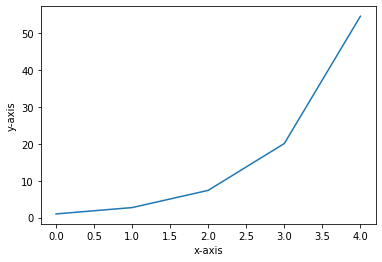

In [213]:
fig = plt.figure()
plt.plot(df_draw['x-axis'], df_draw['y-axis'])
plt.xlabel('x-axis')
plt.ylabel('y-axis')

In [214]:
#add the graph back into Excel:
sht_draw.pictures.add(fig, name='MyPlot', update=True)   

<Picture 'MyPlot' in <Sheet [тест1.xlsx]графики>>

# Создание макросов на xlwings в Excel <a class="anchor" id="макрос"></a>
* [к оглавлению](#разделы)

1. Создаем в файле `.py` скрипт, который мы хотим вызвать в качестве макроса в Excel

In [196]:
%%writefile rand_10.py
import numpy as np
import xlwings as xw

def generate():
    wb = xw.Book.caller()
    wb.sheets[0].range('A1').value = np.random.rand(10) # 42

Overwriting rand_10.py


Once we have the Python script, open up the VBA Editor, you can do this by pressing Alt + F11 inside the Excel app.

2. Для данного Excel файла настраиваем работу с xlwings (настройка references xlwings):
    1. Открываем редактор VBA (сочетание клавиш: Alt + F11)
    2. В меню Tools -> Reference, выбираем чекбокс "xlwings"

<center>         
    <img src="./img/macr1.png" alt="Настройка работы с xlwings: шаг 1" style="width: 500px;"/>
    <b>Настройка работы с xlwings: шаг 1</b>
</center>


<center>         
    <img src="./img/macr2.png" alt="Настройка работы с xlwings: шаг 2" style="width: 500px;"/>
    <b>Настройка работы с xlwings: шаг 2</b>
</center>


3. В окне VBAProject правой кнопкой щелкаем на файл Excel и вставляем модуль.

<center>         
    <img src="./img/macr3.png" alt="Добавление модуля" style="width: 500px;"/>
    <b>Добавление модуля</b>
</center>

4. Вставляем в модуль следующий код:

```
Sub Rand_10()
    RunPython ("import rand_10; rand_10.generate()")
End Sub
```

Код приводит к выполнению следующего скрипта на Python:
* Импорт модуля rand_10.
* Вызов нашей функции.


5. Сохраняем код на VBA. 

6. Создаем кнопку на листе Excel.
    1. Вкладка "Разработчик" (если необходимо подключаем ее через найстройки), далее Вставить -> Кнопка.

<center>         
    <img src="./img/macr4.png" alt="Определение формата ячейки в Excel" style="width: 500px;"/>
    <b>Определение формата ячейки в Excel</b>
</center>


7. Настраиваем на нажатие кнопки макрос VBA Rand_10()

<center>         
    <img src="./img/macr5.png" alt="Определение формата ячейки в Excel" style="width: 500px;"/>
    <b>Определение формата ячейки в Excel</b>
</center>

8. После нажатия кнопки в дапазоне A1:J1 первого листа появятся сгенерированные значения.

## Создание пользовательских функций Excel на xlwings <a class="anchor" id="пользовательских"></a>
* [к оглавлению](#разделы)

__Пользовательские функции__ (user-defined function, UDF) в Excel - функции на VBA, разработанные пользователями. UDF могут использоваться в функциях листов Excel на равне со встроенными функциями.

Создание UDF на VBA не удобно:
* Нужно изучать VBA (язык с очень узкой нишей)
* VBA не удобно использовать 
* VBA обладает очень ограниченной функциональностью

xlwings позволяет создавать собственные UDF на Python:
* используя удобный и мощный язык программирования
* используя многочисленные библиотеки, доступные для Python
* ограничение: на данный момент UDF в xlwings доступны только для Windows

In [3]:
%%writefile my_project.py
import xlwings as xw

# @xw.func is a decorator. 
# It must be added right before the def to let xlwings know this is a user-defined function.
@xw.func
def double_sum(x, y):
    """Returns twice the sum of the two arguments"""
    # The function must return something so the returned value can be passed into Excel
    return 2 * (x + y)

Writing my_project.py


1. Для использование настроек по умолчанию должны выполняться следующие требования:
    * файл Excel должен быть в той же директории что и скрипт с UDF
    * имя файла Excel и модуля py должны совпадать (с точностью до расширения файлов)
    
2. Необходимы следующие настройки безопасности:
    * сохранить файл как файл Excel с поддержкой макросов (расширение: .xlsm или .xlsb)
    * установить параметр "Доаверять доступ к объектной модели VBA": Файл -> Параметры -> Центр управления безопасностью -> Параметры центра управления безопасностью -> Параметры макросов -> Доаверять доступ к объектной модели VBA

<center>         
    <img src="./img/udf0.png" alt="Определение формата ячейки в Excel" style="width: 700px;"/>
    <b>Настройка параметра "Доаверять доступ к объектной модели VBA"</b>
</center>

3. В меню xlwings в Excel нажимаем кнопку "Import Functions"
4. После этого используем функцию в необходимой ячейке

<center>         
    <img src="./img/udf1.png" alt="Использование UDF double_sum" style="width: 700px;"/>
    <b>Использование UDF double_sum</b>
</center>


* The __@xw.func decorator__ is only used by xlwings when the function is being imported into Excel. __It tells xlwings for which functions it should create a VBA wrapper__ function, otherwise it has no effect on how the functions behave in Python.

Как переносятся изменения UDF в Excel:

* Code changes in the actual functions are picked up automatically (i.e. at the next calculation of the formula, e.g. triggered by Ctrl-Alt-F9)

* You only need to __re-import your functions if you change__ 
    * the function arguments 
    * the function name.

* but changes in imported modules are not. This is the very behaviour of how Python imports work. If you want to make sure everything is in a fresh state, click __Restart UDF Server__.

## Формулы массива в Excel и создание UDF функций массива <a class="anchor" id="UDF_массива"></a>
* [к оглавлению](#разделы)

Создание формулы массива 


__Формула массива__ — это формула, с помощью которой можно выполнить несколько расчетов для одного или нескольких элементов в массиве. 
* Они также называются формулами "Ctrl-Shift" или "CSE", так как для их ввода требуется нажать клавиши CTRL + SHIFT + ВВОД.
* Вы можете представить массив как строку или столбец значений либо сочетание строк и столбцов значений. 
* Формулы массива могут возвращать либо несколько результатов, либо один результат.

В Excel существует два типа формул массива: формулы массива, которые выполняют несколько вычислений для создания одного результата и формулы массива, которые рассчитывают несколько результатов. Некоторые функции возвращают массивы значений или требуют массив значений в качестве аргумента. 

* Calling one big array formula in Excel is __much more efficient than calling many single-cell formulas__, so it’s generally a good idea to use them, especially if you hit performance problems.
* You can __pass an Excel Range as a function argument__, as opposed to a single cell and it will show up in Python as list of lists.
* 
For example, you can write the following function to add 1 to every cell in a Range:

In [326]:
%%writefile arr_formula1.py
import xlwings as xw

@xw.func
def add_one(data):
    return [[cell + 1 for cell in row] for row in data]

Writing arr_formula1.py


The above formula has the issue that it expects a “two dimensional” input, e.g. a nested list of the form [[1, 2], [3, 4]]. Therefore, if you would apply the formula to a single cell, you would get the following error: TypeError: 'float' object is not iterable.

In [335]:
%%writefile arr_formula1.py
import xlwings as xw

# декоратор указывает что параметр представляет собой двухмерный массив:
@xw.func
@xw.arg('data', ndim=2)
def add_one(data):
    return [[cell + 1 for cell in row] for row in data]

Overwriting arr_formula1.py


`@xw.arg` and `@xw.ret` decorators

These decorators are to UDFs what the options method is to Range objects: they allow you to __apply converters and their options__ to:
* function arguments (@xw.arg)
* to the return value (@xw.ret). 

For example, to convert the argument x into a pandas DataFrame and suppress the index when returning it, you would do the following:

In [336]:
%%writefile arr_formula1.py
import xlwings as xw
import numpy as np
import pandas as pd

# декоратор указывает что параметр представляет собой двухмерный массив:
@xw.func
@xw.arg('data', ndim=2)
def add_one(data):
    return [[cell + 1 for cell in row] for row in data]

@xw.func
@xw.arg('x', np.array, ndim=2)
@xw.arg('y', np.array, ndim=2)
def matrix_mult(x, y):
    return x @ y

@xw.func
@xw.arg('x', pd.DataFrame, index=False, header=False)
@xw.ret(index=False, header=False)
def CORREL2(x):
    """Like CORREL, but as array formula for more than 2 data sets"""
    return x.corr()

@xw.sub
def my_macro():
    """Writes the name of the Workbook into Range("A1") of Sheet 1"""
    wb = xw.Book.caller()
    wb.sheets[0].range('A1').value = wb.name

Overwriting arr_formula1.py


A great example of how you can put Pandas at work is the creation of an array-based CORREL formula. Excel’s version of CORREL only works on 2 datasets and is cumbersome to use if you want to quickly get the correlation matrix of a few time-series, for example. Pandas makes the creation of an array-based CORREL2 formula basically a one-liner

`@xw.sub` decorator

On Windows, as alternative to calling macros via RunPython, you can also use the @xw.sub decorator.

Under the Developer tab, you can insert a button via Insert > Form Controls. After drawing the button, you will be prompted to assign a macro to it and you can select my_macro.

# Организация данных в виде многомерных кубов <a class="anchor" id="OLAP"></a>
* [к оглавлению](#разделы)

Характеристики OLTP и OLAP

Характеристики OLTP системы
* Большой объем информации
* Часто различные БД для разных подразделений
* Нормализованная схема, отсутствие дублирования информации
* Интенсивное изменение данных
* Транзакционный режим работы
* Транзакции затрагивают небольшой объем данных
* Обработка текущих данных – мгновенный снимок
* Много клиентов
* Малое время отклика – несколько секунд
 
Характеристики OLAP системы
* Большой объем информации
* Синхронизированная информация из различных БД с использованием общих 	классификаторов
* Ненормализованная схема БД с дубликатами
* Данные меняются редко, Изменение происходит через пакетную загрузку 
* Выполняются сложные нерегламентированные запросы над большим объемом данных с 	широким применением группировок и агрегатных функций.
* Анализ временных зависимостей
* Небольшое количество работающих пользователей – аналитики и менеджеры
* Большее время отклика (но все равно приемлемое) – несколько минут

__Элементы OLAP-куба__

Измерение (dimension) - множество объектов одного или нескольких типов, организованных в виде иерархической структуры и обеспечивающих информационный контекст числового показателя. Измерение принято визуализировать в виде ребра многомерного куба. Объекты, совокупность которых и образует измерение, называются членами измерений (members). Члены измерений визуализируют как точки или участи, откладываемые на осях гиперкуба.

Ячейка (cell) - атомарная структура куба, соответствующая полному набору конкретный значений измерений.

Факт - числовая величина которая располагается в ячейках гиперкуба. Один OLAP-куб может обладать одним или несколькими показателями.

Иерархия - группировка объектов одного измерения в объекты более высокого уровня. Например - день-месяц-год. Иерархии в измерениях необходимы для возможности агрегации и детализации значений показателей согласно их иерархической структуре. Иерархия целиком основывается на одном измерении и формируется из уровней.

Архитектурное решение организации листов операционных / капитальных затрат
